In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/crop_production.csv")   # area is in sq m

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
for col_name in df.columns:
  print(df[df[col_name]==0].shape)

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(3523, 7)


In [ ]:
df[df["Production"]==0]
df['Production'] = df['Production'].replace([0.0],np.NaN)

In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       7253
dtype: int64

In [ ]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [ ]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [ ]:
df.drop(['Crop_Year','District_Name'],axis=1,inplace=True)

In [ ]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

State_Name    0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [ ]:
df.shape

(238838, 5)

In [ ]:
type(df.Area[0])

numpy.float64

In [ ]:
type(df.Production[0])

numpy.float64

In [ ]:
for col_name in ['Area','Production']:
  q1=df[col_name].quantile(q=0.25)
  q3=df[col_name].quantile(q=0.75)
  iqr=q3-q1
  upper_bound=q3+ 1.5*iqr
  lower_bound=q1- 1.5*iqr
  print(col_name,":",lower_bound,"-",upper_bound)
  print("no of data below lower bound: ",df[col_name][df[col_name]<lower_bound].shape[0]," no of data above upper bound: ",df[col_name][df[col_name]>upper_bound].shape[0])
  print()
  

Area : -6822.5 - 11613.5
no of data below lower bound:  0  no of data above upper bound:  39233

Production : -10711.904999999999 - 18117.175
no of data below lower bound:  0  no of data above upper bound:  41632



In [ ]:
df.loc[(df['Area']>upper_bound) & (df['Crop']=="Rice")]

,State_Name,Season,Crop,Area,Production
216,Andhra Pradesh,Kharif,Rice,35600.0,75400.0
244,Andhra Pradesh,Kharif,Rice,38300.0,96800.0
253,Andhra Pradesh,Rabi,Rice,26600.0,63900.0
268,Andhra Pradesh,Kharif,Rice,37991.0,105082.0
281,Andhra Pradesh,Rabi,Rice,20258.0,45669.0
...,...,...,...,...,...
245954,West Bengal,Winter,Rice,152676.0,261435.0
245985,West Bengal,Winter,Rice,270270.0,731799.0
246017,West Bengal,Winter,Rice,288735.0,729553.0
246052,West Bengal,Winter,Rice,302274.0,730136.0


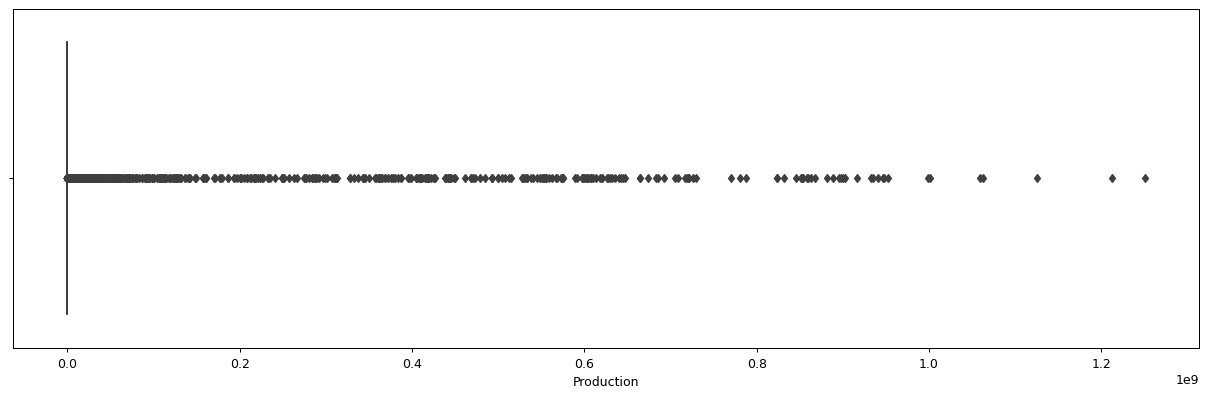

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.boxplot(x=df["Production"])

In [ ]:
df[df['Area']>100000]

,State_Name,Season,Crop,Area,Production
208,Andhra Pradesh,Kharif,Groundnut,650800.0,228400.0
236,Andhra Pradesh,Kharif,Groundnut,755200.0,867800.0
261,Andhra Pradesh,Kharif,Groundnut,694865.0,249457.0
294,Andhra Pradesh,Kharif,Groundnut,791559.0,884963.0
342,Andhra Pradesh,Kharif,Groundnut,758700.0,333828.0
...,...,...,...,...,...
245954,West Bengal,Winter,Rice,152676.0,261435.0
245985,West Bengal,Winter,Rice,270270.0,731799.0
246017,West Bengal,Winter,Rice,288735.0,729553.0
246052,West Bengal,Winter,Rice,302274.0,730136.0


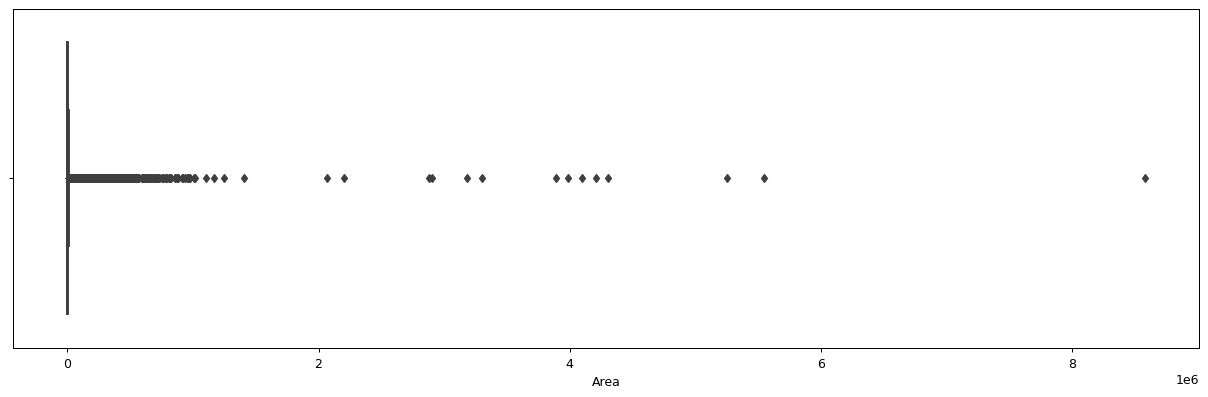

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.boxplot(x=df["Area"])

In [ ]:
df.drop(df[ df['Area']> 100000 ].index,axis=0,inplace=True)
df.shape

(231092, 5)

In [ ]:
df.corr(method="spearman")

,Area,Production
Area,1.000000,0.883479
Production,0.883479,1.000000


In [ ]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
df['Season'] = df['Season'].replace(['Kharif     '],'Kharif')
df['Season'] = df['Season'].replace(['Whole Year '],'Whole Year')
df['Season'] = df['Season'].replace(['Autumn     '],'Autumn')
df['Season'] = df['Season'].replace(['Rabi       '],'Rabi')
df['Season'] = df['Season'].replace(['Summer     '],'Summer')
df['Season'] = df['Season'].replace(['Winter     '],'Winter')

In [ ]:
df

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246085,West Bengal,Summer,Maize,325.0,2039.0
246086,West Bengal,Summer,Rice,306.0,801.0
246087,West Bengal,Summer,Sesamum,627.0,463.0
246088,West Bengal,Whole Year,Sugarcane,324.0,16250.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


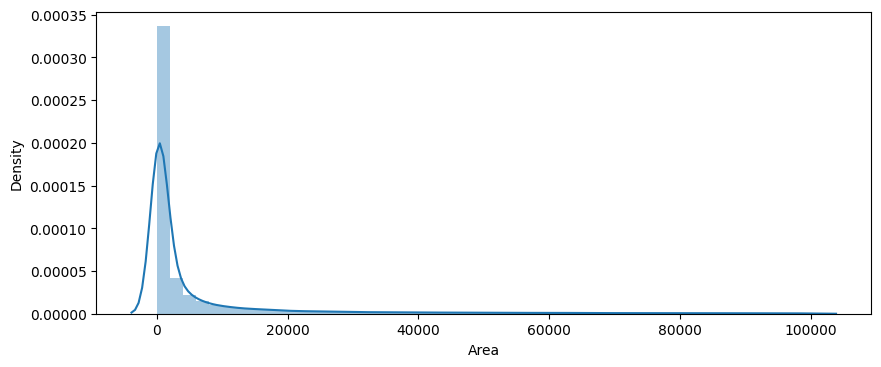

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.distplot(df['Area'])

**Inference**: Most of the Area lies below 20000 square metres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


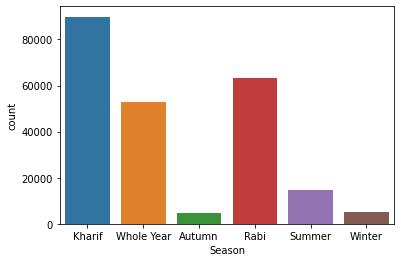

In [ ]:
sns.countplot(df['Season'])

**Inference**:In most parts of India Kharif and Rabi are the season for cultivation 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


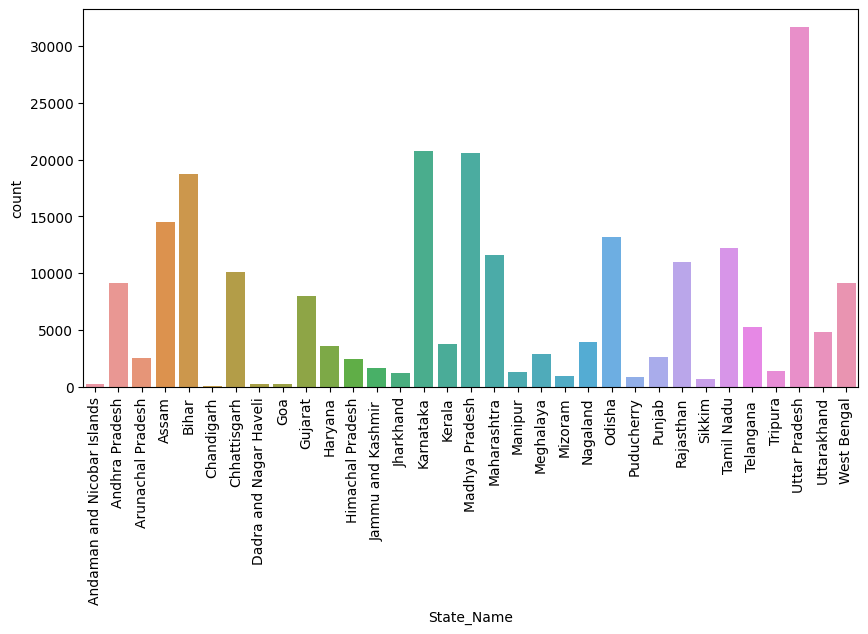

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.xticks(rotation='vertical')
#(df['State_Name'].value_counts()/len(df)).plot.bar()
sns.countplot(df['State_Name'])

**Inference**:Uttar Pradesh,Karnataka,Madhya Pradesh are the top agricultural state in India

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


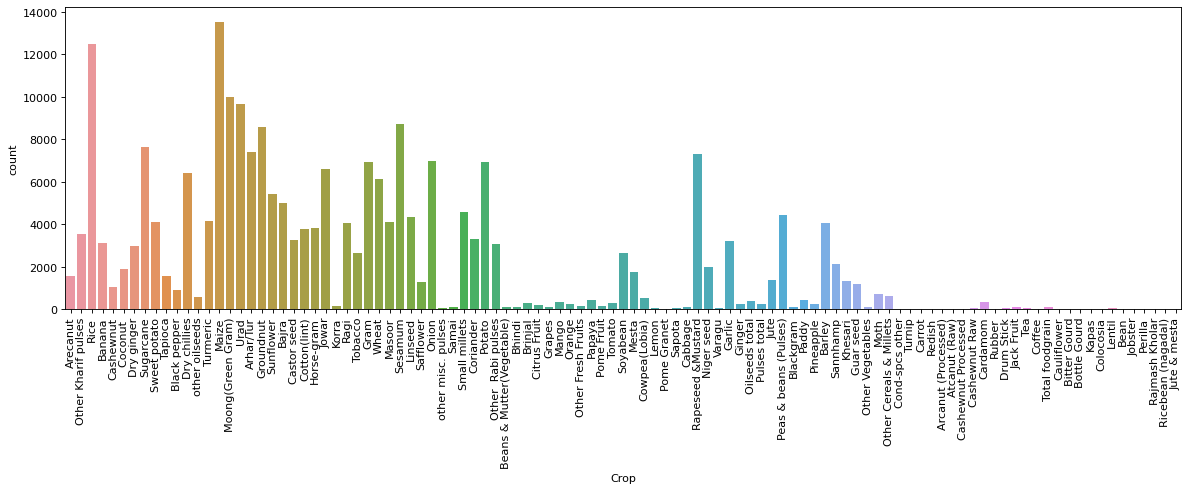

In [ ]:
plt.figure(figsize=(18,5),dpi=80)
plt.xticks(rotation='vertical')
#(df['Crop'].value_counts()/len(df)).plot.bar()
sns.countplot(df['Crop'])

**Inference**:Top 5 crops grown in India are:Maize,Rice,Moong,Urad,Sesamum

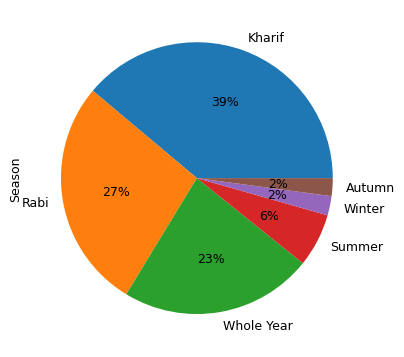

In [ ]:
plt.figure(figsize=(10,5),dpi=90)
df['Season'].value_counts().plot(kind='pie',autopct="%1.0f%%")

**Inference**:In most parts of India Kharif and Rabi are the season for cultivation

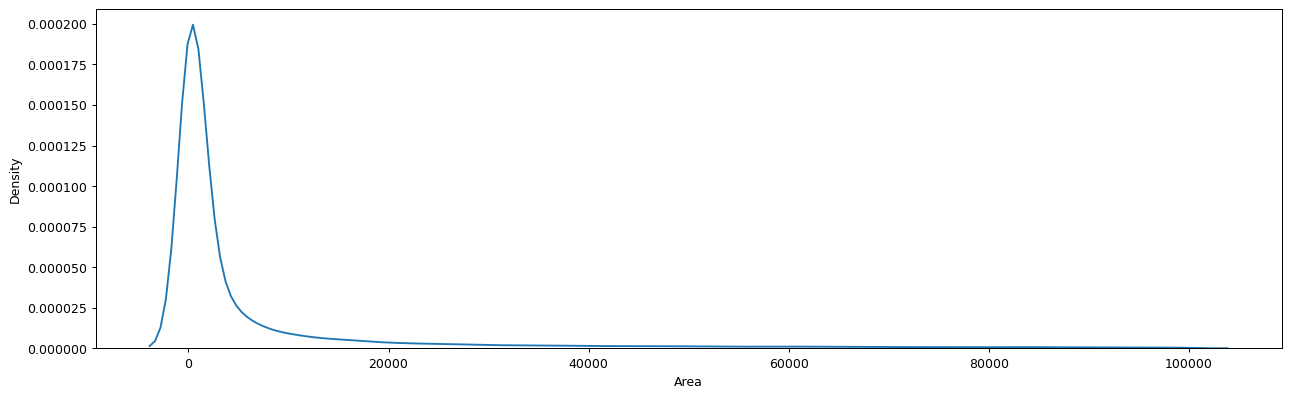

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.kdeplot(df['Area'])

**Inferenc**e: Most of the Area lies below 20000 square metres and it is right-skewed distribution 

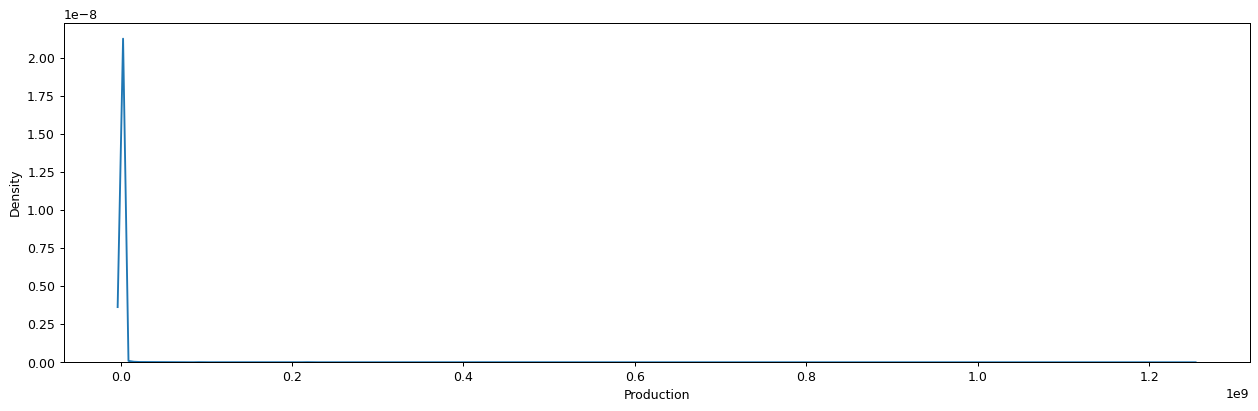

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.kdeplot(df['Production'])

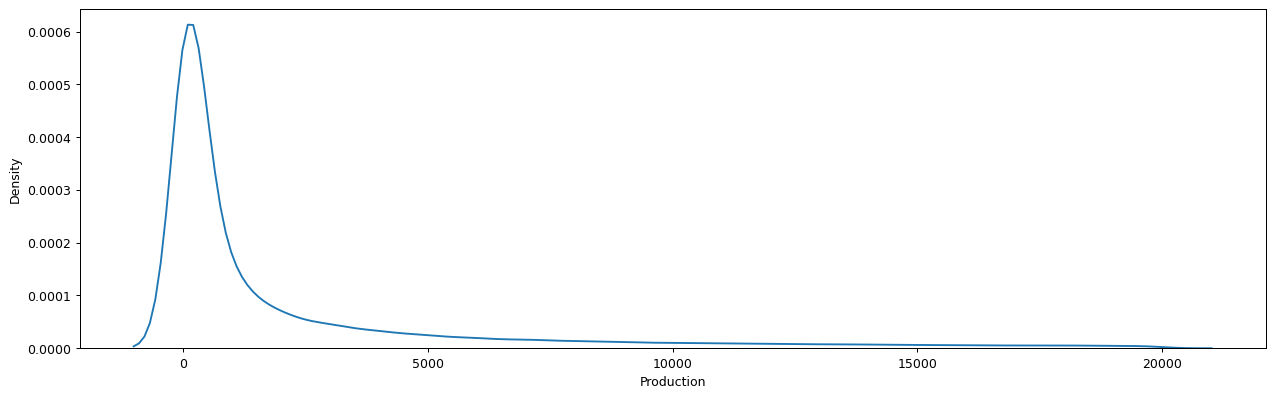

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.kdeplot(df[df['Production']<20000]['Production'])

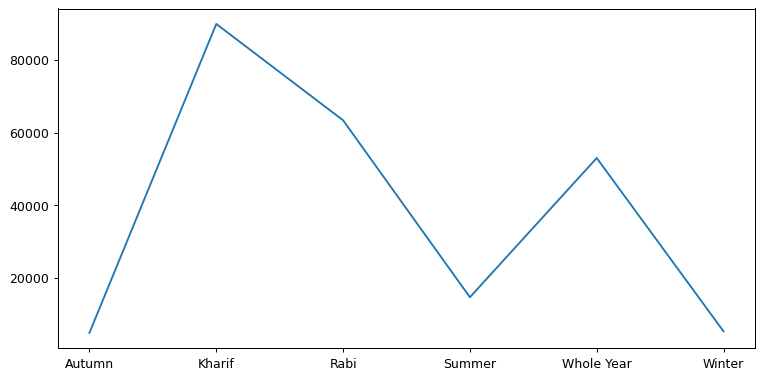

In [ ]:
plt.figure(figsize=(10,5),dpi=90)
df['Season'].value_counts().sort_index().plot.line()

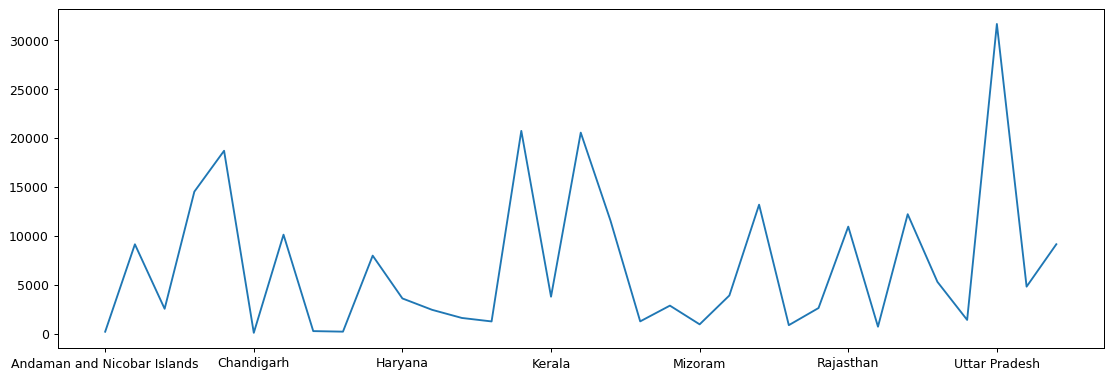

In [ ]:
plt.figure(figsize=(15,5),dpi=90)
df['State_Name'].value_counts().sort_index().plot.line()